
# Explanatory Analysis of National Health and Nutrition Examination Survey (NHANES) data

### Contents
1. Setting the Environement
2. Data preprocessing
    - Statistics
    - Grouping of variables
3. Univariate Analysis
    - Visualising in 1-Dimension
4. Multivaraite Analysis
    - Visualising in 2-Dimension
    - Visualising in 3-Dimension
    - Visualising in in 4-Dimension
    

## 1. Setting the Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
from pandas import ExcelWriter

## 2. Data Preprocessing

In [2]:
df = pd.read_excel('obesity_analysis.xlsx')
df.head()

#df.head()
df.dropna()
print('Observations: ' + str(df.shape[0]))
print('Features: ' + str(df.shape[1]))


Observations: 1612
Features: 12


###   - Descriptive Statistics

df.keys()
df.describe()
descriptive_stats =pd.DataFrame( df.describe())
writer = ExcelWriter('descriptive_stats.xlsx')
descriptive_stats.to_excel(writer,'descriptive_stats')
writer.save()
descriptive_stats

In [3]:
 #This feature has inconsistent data
print('**** Annual household income')
print(df[ ' Annual household income'].unique()[0:5])

# This feature does not have inconsistent data
print('\n**** Hrs TV/Video use')
print(df[ 'Hrs TV/Video use'].unique()[0:5])

**** Annual household income
[15. 12.  5. 14. 10.]

**** Hrs TV/Video use
[2 1 5 3 0]


In [4]:
#descriptive_stats =pd.DataFrame( df.describe())
#writer = ExcelWriter('descriptive_stats.xlsx')
#descriptive_stats.to_excel(writer,'descriptive_stats')
#writer.save()

### - Creating new attributes: 
 #### 'BMI Obese Class'
* According to the: https://www.cdc.gov/obesity/adult/defining.html obesity is frequently subdivided into categories:

      - Class 1: BMI of 30 to < 35
      -  Class 2: BMI of 35 to < 40
      -  Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “extreme” or “severe” obesity.
* For this analyis the creation of another column with this attribute could provide some insight for the multivariate analysis.
    - Note: thr replacement of  the 'NA' values in the BMI attribute with zero so as to enable the classification 'BMI class attribute'


    

In [5]:
#cleaning th bmi attribute inorder to create a new column
df['BMI '] = df['BMI '].replace(np.nan, 0)
df['BMI '] =df['BMI '].astype(int)
df['BMI ']

0        0
1       35
2       23
3       26
4       32
        ..
1607    25
1608    33
1609    23
1610    26
1611    34
Name: BMI , Length: 1612, dtype: int64

In [6]:
#function for the new BMI Obese Class conditons
def label_bmi (row):
    
    #if row['eri_hispanic'] == 1 :
   if ((row['BMI '] >=30) & (row['BMI '] < 35)):
      return 'Class 1'
   if ((row['BMI '] >=35) & (row['BMI '] < 40)):
      return 'Class 2'
   if (row['BMI '] >=40):
      return 'Class 3'   
   else:
      return 'Other'
df['BMI Class'] = df.apply (lambda row: label_bmi(row), axis =1)
df['BMI Class']

0         Other
1       Class 2
2         Other
3         Other
4       Class 1
         ...   
1607      Other
1608    Class 1
1609      Other
1610      Other
1611    Class 1
Name: BMI Class, Length: 1612, dtype: object

In [7]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'BMI status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'BMI Class'],
      dtype='object')

### - Replacing numerical categorical values with their nominal descriptive values for easier recognition in data visualistion

####  1. Gender: male =1 or female =2

In [8]:
#Gender: male =1 or female =2
#df['Gender'] = df['Gender'].replace([1, 2], ['male', 'female'], inplace=True)
df['Gender'] = df['Gender'].map({1:'male', 2:'female'})

df['Smoke Status']

0       3.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1607    3.0
1608    NaN
1609    NaN
1610    NaN
1611    NaN
Name: Smoke Status, Length: 1612, dtype: float64

#### 2. Smoke Status: 1=every day ; 2 = some days; 3= non smoker

In [9]:
#Smoke Status: 1=every day ; 2 = some days; 3= not at all
df['Smoke Status'] = df['Smoke Status'].replace({1.0:'smokes daily', 2.0:'smokes some days', 3.0:'non smoker'})

df['Smoke Status']

0       non smoker
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1607    non smoker
1608           NaN
1609           NaN
1610           NaN
1611           NaN
Name: Smoke Status, Length: 1612, dtype: object

In [10]:
df[ ' Annual household income']

0       15.0
1       12.0
2       15.0
3        5.0
4       15.0
        ... 
1607     4.0
1608     7.0
1609     8.0
1610     9.0
1611     7.0
Name:  Annual household income, Length: 1612, dtype: float64

#### 3. Hours spent watching TV/ Videos:
     -0=  Less than 1 hour,
     - 1 = 1 hour
     - 2 =2 hours
     - 3 = 3 hours
     - 4= 4 hours, or
     - 5= 5 hours or more, or
     - 8= {You don't/SP does not} watch TV or videos
* In this attribute, I replaced 8 with zero

In [11]:
df[ ' Annual household income'] = df[ ' Annual household income'].replace({8:0})
df['Hrs TV/Video use']

0       2
1       1
2       1
3       2
4       5
       ..
1607    1
1608    0
1609    5
1610    3
1611    5
Name: Hrs TV/Video use, Length: 1612, dtype: int64

#### 4. Annual household income
     - 1 = $ 0 - $ 4,999	
     - 2 = $ 5,000 -  $9,999	
     - 3 = $10,000 - $14,999		
     - 4 =	$15,000 - $19,999	
     - 5 =	$20,000 - $24,999		
     - 6 =	$25,000 - $34,999		
     - 7 =	$35,000 - $44,999		
     - 8 =	$45,000 - $54,999	
     - 9 =	$55,000 - $64,999	
     - 10 =$65,000 - $74,999		
     - 12 = $20,000 -$24,999	
     - 13 = $15,000 - $19,999
     - 14= $75,000 - $99,999		1
     - 15 = $100,000 and Over

In [12]:
df[' Annual household income'] = df[' Annual household income'].replace({1.0:'0 - 4.999K',
                                                        2.0:'5K - 9.999K',
                                                        3.0:'10K - 14.999K',
                                                        4.0:'15K - 19.999K',
                                                        5.0:'20K - 24.99K',
                                                        6.0:'25K - 34.999K',
                                                        7.0:'35K - 44.999K',
                                                        8.0:'45K - 54.999K',
                                                        9.0:'55K - 64.999K ',
                                                        10.0:'65K - 74.999K',
                                                        12.0:'20K - 24.99K',
                                                        13.0:'15K - 19.999K',
                                                        14.0:'75K - 99.999K',
                                                        15.0:'100K and over'})
df[' Annual household income']

0        100K and over
1         20K - 24.99K
2        100K and over
3         20K - 24.99K
4        100K and over
             ...      
1607     15K - 19.999K
1608     35K - 44.999K
1609                 0
1610    55K - 64.999K 
1611     35K - 44.999K
Name:  Annual household income, Length: 1612, dtype: object

In [13]:
#BMI_class_attr=pd.DataFrame( df)
#writer = ExcelWriter('BMI_class_attr.xlsx')
#BMI_class_attr.to_excel(writer,'BMI_class_attr')
#writer.save()

In [14]:
#df[' Ethnicity']

#### 5. Race:
    - 1= Mexican American
    - 2= Other Hispanic
    - 3= Non-Hispanic White
    - 4= Non-Hispanic Black
    - 5=Other Race - Including Multi-Racial




In [15]:
df[' Ethnicity'] = df[' Ethnicity'].replace({1: 'Mexican American',
                                            2: 'Other Hispanic',
                                            3: 'Non-Hispanic White',
                                            4: 'Non-Hispanic Black',
                                            5: 'Other Race'})
df[' Ethnicity'] 

0           Other Hispanic
1       Non-Hispanic Black
2               Other Race
3       Non-Hispanic White
4       Non-Hispanic Black
               ...        
1607        Other Hispanic
1608    Non-Hispanic White
1609    Non-Hispanic Black
1610      Mexican American
1611    Non-Hispanic Black
Name:  Ethnicity, Length: 1612, dtype: object

#### 5. Eating out expenditure
- Eating out expenditure has values: 999999, 777777 which according to the codebook, are values of people who refused to answer and did not know. Since these values are  are extreme (values in this variable range from 0-2142) and are certainly not relevant, exclusion is necessary.



In [16]:
df['Eating Out Spenditure']=df['Eating Out Spenditure'].replace(999999.0, np.nan)
df['Eating Out Spenditure']=df['Eating Out Spenditure'].replace(777777.0, np.nan)



In [17]:

print('Observations: ' + str(df.shape[0]))
print('Features: ' + str(df.shape[1]))

Observations: 1612
Features: 13


## Univariate Analysis
    - The objective here is to analyze one data attribute or variable and visualizing the same in one dimension.
    - First, its significant to note the attributes and there state whether: categorical, discrete or continuous. 
    - The data set includes the following attributes:
 1. ID: A unique ID for each subject that participated in the survey
 2. Gender: male =1 or female =2
 3. Age: 35=><=50
 4. Smoke Status: 1=every day ; 2 = some days; 3= not at all
 5. BMI: 12.1>=<=82.9 i.e Body Mass Index(kg/m**2)  
 6. BMI status: =>30 = 1/obese <=30 =0/not obese
 7. BMI class: 
     - Class 1: BMI of 30 to < 35
     - Class 2: BMI of 35 to < 40
     -  Class 3: BMI of 40 or higher.
     
 
 8. Eating Out Spenditure: 0=><=2142
    - As dollar amount code of money spent in 30 days
 9. Hrs TV/Video use: Hours spent per day watching TV or videos past 30 days 
     - 0 =Less than 1 hour,
     - 1 = 1 hour
     - 2 =2 hours
     - 3 = 3 hours
     - 4= 4 hours, or
     - 5= 5 hours or more, or
     - 8= {You don't/SP does not} watch TV or videos
 10. Cholestrol Level: cholesterol (mg/dL)
     range: 14>=<=375
 11. Cholestrol Level SI': SI format for cholestral
 12. Annual household income: 
     - 1 = $ 0 - $ 4,999	
     - 2 = $ 5,000 -  $9,999	
     - 3 = $10,000 - $14,999		
     - 4 =	$15,000 - $19,999	
     - 5 =	$20,000 - $24,999		
     - 6 =	$25,000 - $34,999		
     - 7 =	$35,000 - $44,999		
     - 8 =	$45,000 - $54,999	
     - 9 =	$55,000 - $64,999	
     - 10 =$65,000 - $74,999		
     - 12 = $20,000 and Over
     - 13 = Under $20,000
     - 14= $75,000 - $99,999		1
     - 15 = $100,000 and Over		
    
13.Race:
    - 1= Mexican American
    - 2= Other Hispanic
    - 3= Non-Hispanic White
    - 4= Non-Hispanic Black
    - 5=Other Race - Including Multi-Racial

    
### - Visualizing data in One Dimension

#### 1. Visualizing the continuous, numeric attributes

#### -Cholestrol level

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


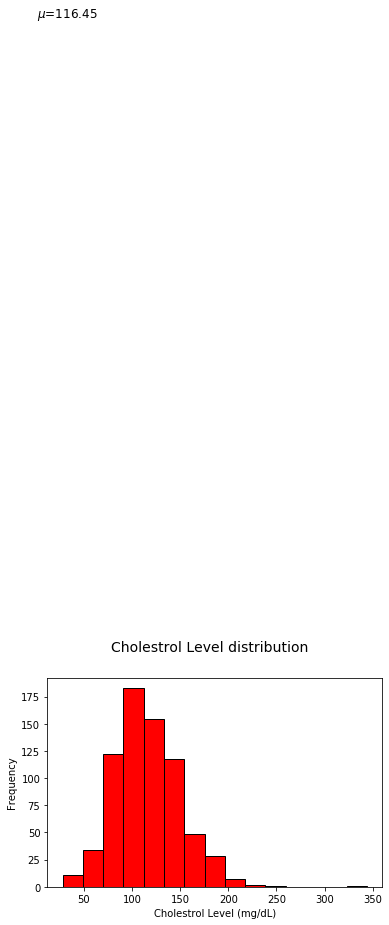

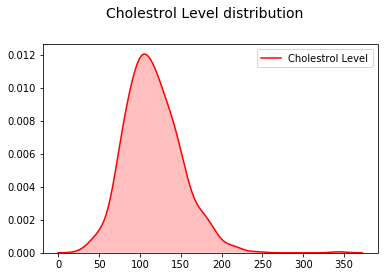

In [18]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Cholestrol Level distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Cholestrol Level (mg/dL)")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['Cholestrol Level'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['Cholestrol Level'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Cholestrol Level distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel("Cholestrol Level (mg/dL)")
ax.set_ylabel("Frequency")
sns.kdeplot(df['Cholestrol Level'], ax=ax1, shade=True, color='red')
                                    

#### -BMI

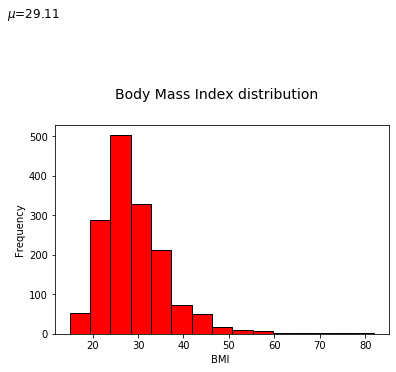

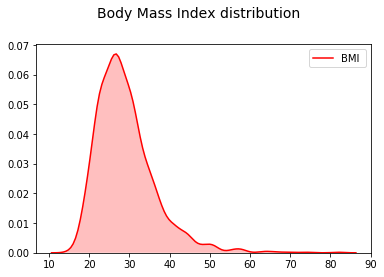

In [19]:
# Histogram
df['BMI '].replace(0, np.nan, inplace=True)
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Body Mass Index distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['BMI '].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['BMI '] , color='red', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Body Mass Index distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel('BMI ')
ax.set_ylabel("Frequency")
sns.kdeplot(df['BMI '], ax=ax1, shade=True, color='red')
                                    


In [20]:
df['Eating Out Spenditure']

0       300.0
1        30.0
2       100.0
3        60.0
4         0.0
        ...  
1607      0.0
1608    200.0
1609     30.0
1610    428.0
1611     45.0
Name: Eating Out Spenditure, Length: 1612, dtype: float64

#### - Eating out Expenditure

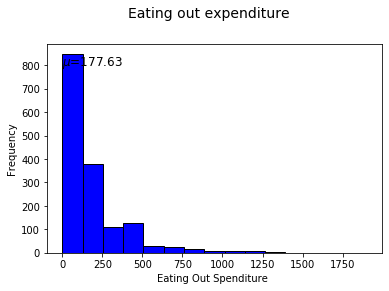

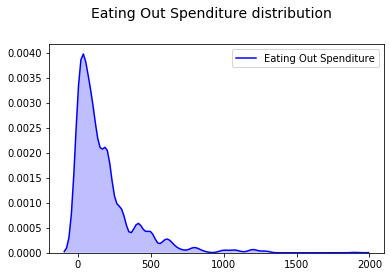

In [21]:
#df['Eating Out Spenditure'].replace(0.0, np.nan, inplace=True)
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Eating out expenditure", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Eating out expenditure")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['Eating Out Spenditure'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['Eating Out Spenditure'] , color='blue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Eating Out Spenditure distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel('Eating Out Spenditure ')
ax.set_ylabel("Frequency")
sns.kdeplot(df['Eating Out Spenditure'], ax=ax1, shade=True, color='blue')



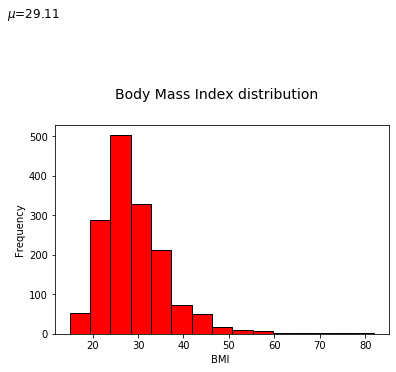

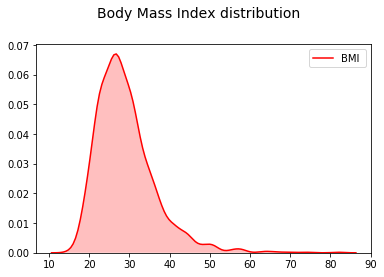

In [22]:
# Histogram
df['BMI '].replace(0, np.nan, inplace=True)
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Body Mass Index distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['BMI '].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['BMI '] , color='red', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Body Mass Index distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel('BMI ')
ax.set_ylabel("Frequency")
sns.kdeplot(df['BMI '], ax=ax1, shade=True, color='red')


#### 2. Visualizing a discrete, categorical data attribute
####  -Age 

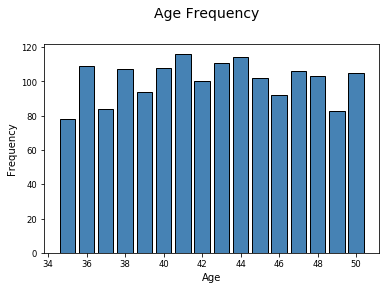

In [23]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
w_q = df['Age'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

#### -Annual household income

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0, 0.5, 'Frequency')

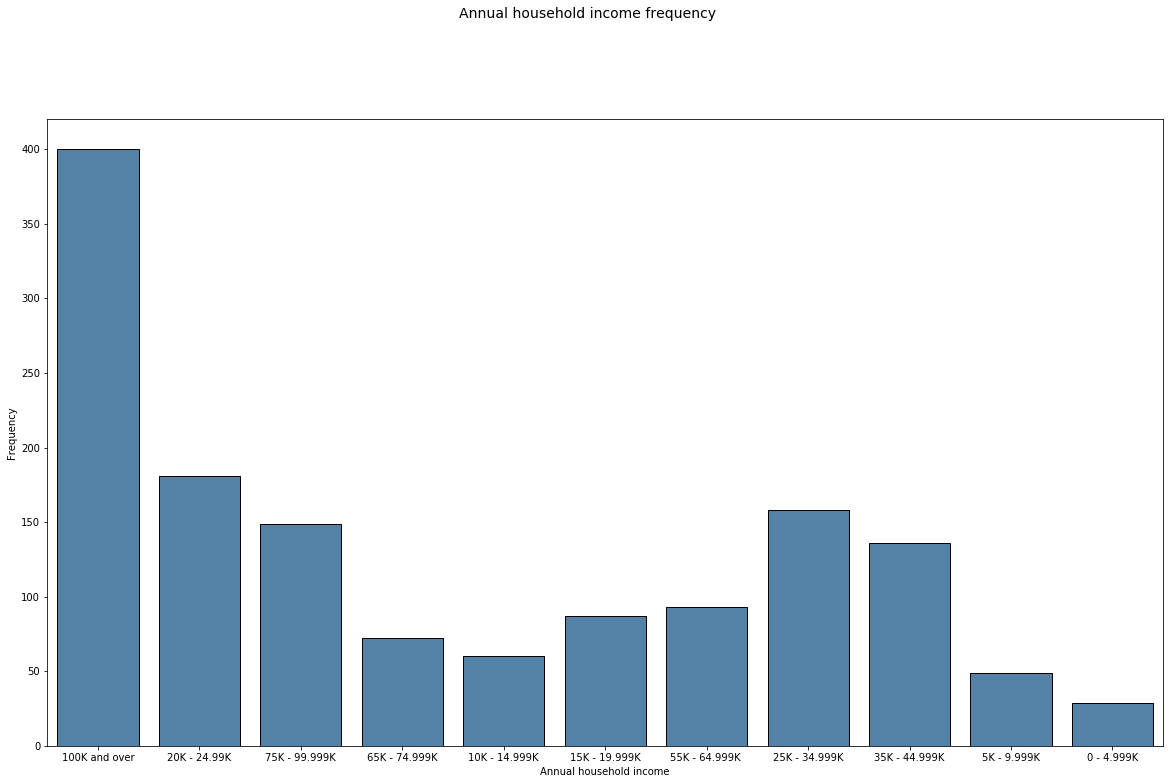

In [24]:
df[' Annual household income'].replace(77.0, np.nan, inplace=True)
df[' Annual household income'].replace(99.0, np.nan, inplace=True)
df[' Annual household income'].replace(0.0, np.nan, inplace=True)
fig = plt.figure(figsize = (20, 12))
title = fig.suptitle("Annual household income frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
sns.countplot(df[' Annual household income'], color='steelblue', 
        edgecolor='black')
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Annual household income")
ax.set_ylabel("Frequency") 

#### 2. Visualizing nominal, categorical data attribute

In [25]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'BMI status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'BMI Class'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Frequency')

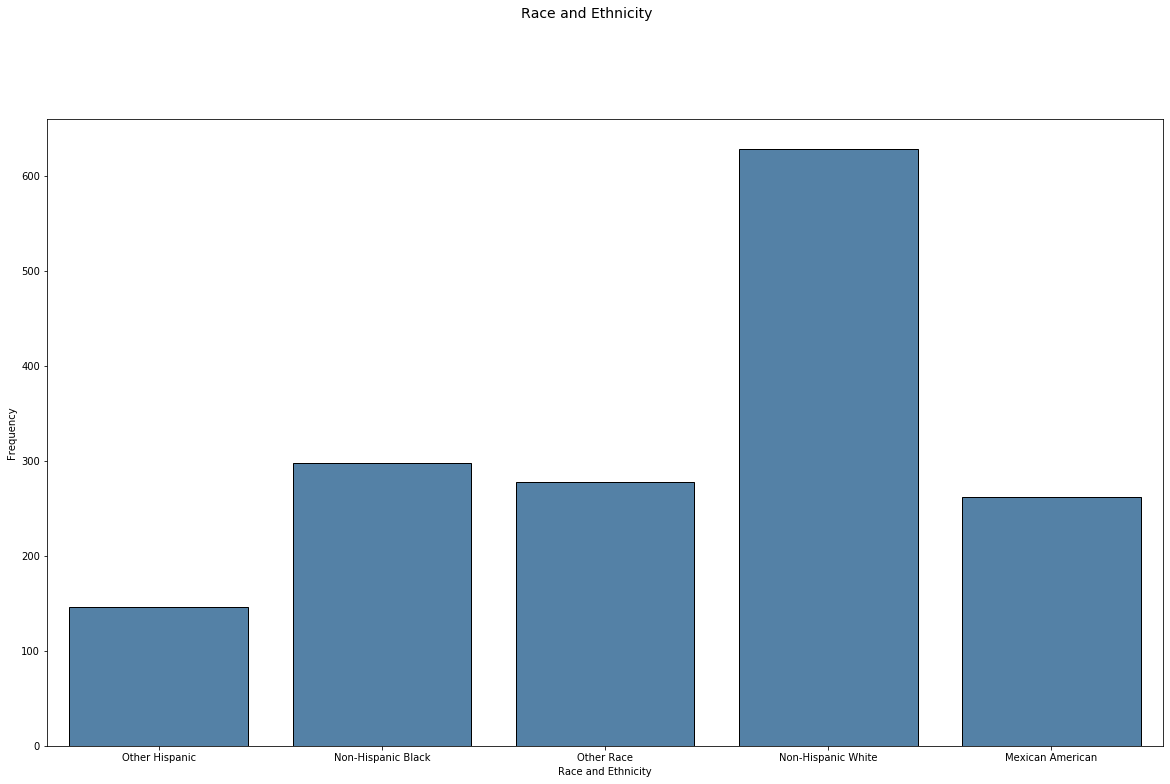

In [26]:

fig = plt.figure(figsize = (20, 12))
title = fig.suptitle("Race and Ethnicity", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
sns.countplot(df[' Ethnicity'], color='steelblue', 
        edgecolor='black')
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Race and Ethnicity")
ax.set_ylabel("Frequency") 

In [27]:
df.dropna()

,ID,Gender,Age,Smoke Status,Ethnicity,BMI,BMI status,Eating Out Spenditure,Hrs TV/Video use,Cholestrol Level,Cholestrol Level SI,Annual household income,BMI Class
5,73600,male,37,smokes daily,Non-Hispanic Black,36.0,1,128.0,2,113.0,2.922,20K - 24.99K,Class 2
8,73619,female,36,non smoker,Mexican American,27.0,0,600.0,1,92.0,2.379,10K - 14.999K,Other
17,73676,male,44,smokes some days,Non-Hispanic White,37.0,1,257.0,4,171.0,4.422,65K - 74.999K,Class 2
19,73702,female,48,smokes daily,Non-Hispanic White,46.0,1,0.0,5,109.0,2.819,55K - 64.999K,Class 3
24,73729,male,46,non smoker,Non-Hispanic White,36.0,1,6.0,5,116.0,3.000,55K - 64.999K,Class 2
25,73730,male,48,smokes daily,Mexican American,26.0,0,75.0,5,88.0,2.276,25K - 34.999K,Other
26,73739,female,46,non smoker,Non-Hispanic White,27.0,0,0.0,2,103.0,2.664,25K - 34.999K,Other
45,73866,female,47,non smoker,Other Hispanic,50.0,1,150.0,2,101.0,2.612,100K and over,Class 3
49,73880,female,50,smokes daily,Non-Hispanic White,41.0,1,200.0,1,84.0,2.172,65K - 74.999K,Class 3
56,73952,male,42,non smoker,Mexican American,39.0,1,150.0,1,114.0,2.948,0 - 4.999K,Class 2


## Multivariate Analysis


     This kind of analysis showcases existent relationships,patterns and correlations among the data set's variable. It provides potential of leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand based on statistical significance for different variables, groups and so on.

### - Correlation heat map
- The gradients in the heatmap vary based on the strength of the correlation 

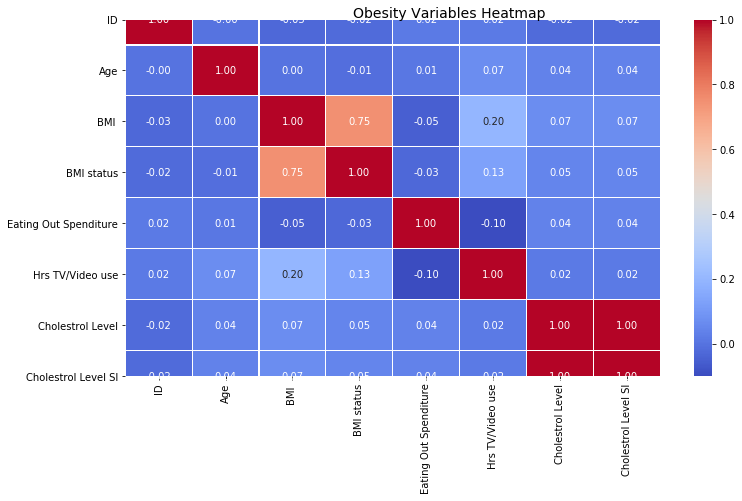

In [28]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.95)
t= f.suptitle('Obesity Variables Heatmap', fontsize=14)

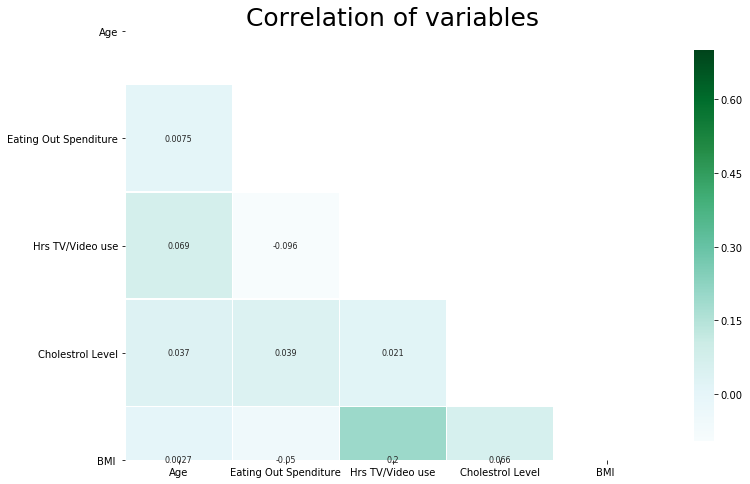

In [29]:
features = ['Age','Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level','BMI ' ]
mask = np.zeros_like(df[features].corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,8))
plt.title("Correlation of variables", fontsize=25)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});



In [30]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'BMI status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'BMI Class'],
      dtype='object')

#### - Pair-wise Scatter Plots
- A different way to spot potential relationships is the use of pairwise plots

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


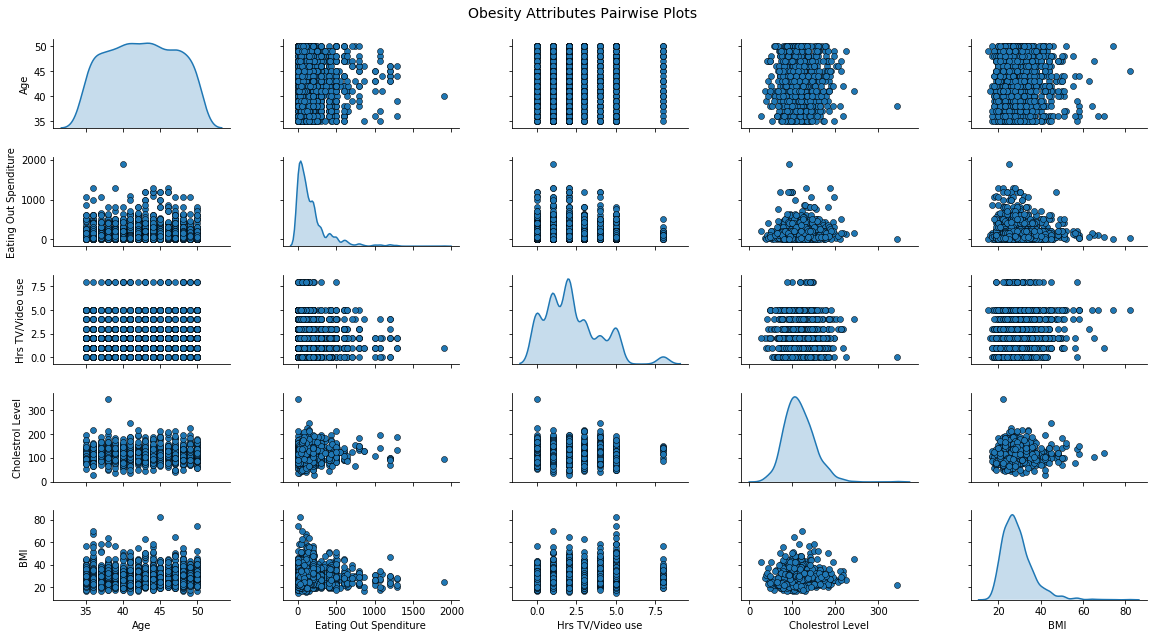

In [31]:
# Pair-wise Scatter Plots

cols = ['Age','Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level','BMI ' ]
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Obesity Attributes Pairwise Plots', fontsize=14)

#### -Gender distribution in different variables
###### Kdeplot 
- The kde plot an excellent way to view the distribution of binominal variables in respective to other variables 
- The results show that there is no significant difference in male and female distribution in the different variables

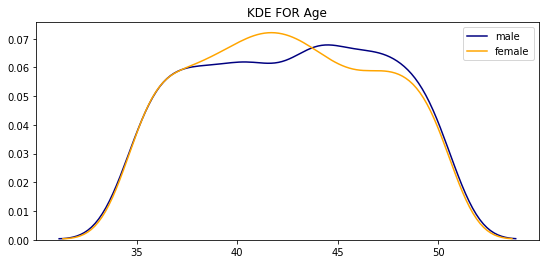

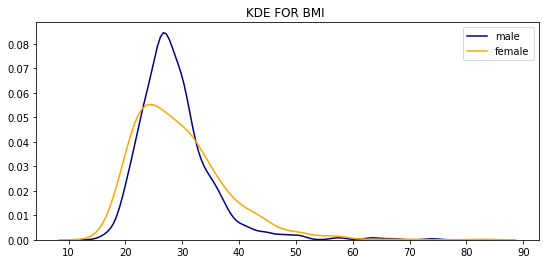

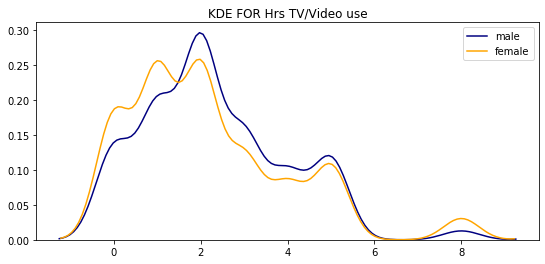

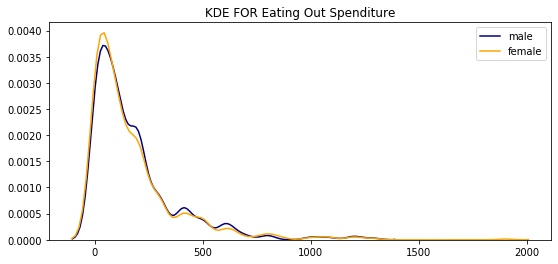

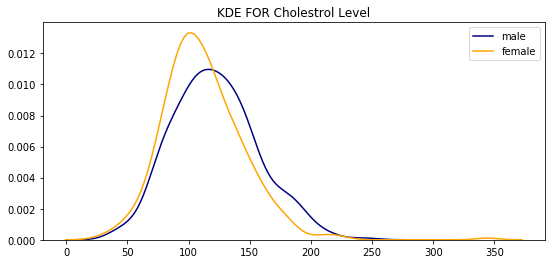

In [32]:

def kdeplot(feature):
    plt.figure(figsize=(9,4))
    plt.title("KDE FOR {}".format(feature))
    ax0=sns.kdeplot(df[df['Gender']== 'male'][feature], color ='navy', label = 'male')
    ax1=sns.kdeplot(df[df['Gender']== 'female'][feature], color ='orange', label = 'female')
  
kdeplot('Age')
kdeplot('BMI ')
kdeplot('Hrs TV/Video use')
kdeplot('Eating Out Spenditure')
kdeplot('Cholestrol Level')

In [ ]:
# Pair-wise Scatter Plots

cols = ['Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level','BMI ' ]
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Obesity Attributes Pairwise Plots', fontsize=14)

In [37]:
df_income = pd.DataFrame(df, columns =[' Annual household income', 'ID','Eating Out Spenditure','BMI '])
df_income= df.groupby(' Annual household income').agg({'ID':'count','Eating Out Spenditure':'sum','BMI ':'mean','Hrs TV/Video use':'mean'}).reset_index()

df_income

,Annual household income,ID,Eating Out Spenditure,BMI,Hrs TV/Video use
0,0 - 4.999K,29,1471.0,27.444444,2.965517
1,100K and over,400,121201.0,27.292746,1.827500
2,10K - 14.999K,60,4622.0,31.446429,3.216667
3,15K - 19.999K,87,7177.0,31.939024,3.114943
4,20K - 24.99K,181,19607.0,30.000000,2.237569
5,25K - 34.999K,158,17046.0,29.370130,2.329114
6,35K - 44.999K,136,16122.0,30.123077,2.404412
7,55K - 64.999K,93,15767.0,29.179775,2.247312
8,5K - 9.999K,49,3484.0,29.530612,2.734694
9,65K - 74.999K,72,12712.0,30.000000,2.486111
